In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from sklearn.neighbors import KernelDensity
from torch.nn.functional import avg_pool2d

import torch
from geomloss import SamplesLoss

use_cuda = torch.cuda.is_available()
dtype = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

In [2]:
def grid(W):
    y, x = torch.meshgrid([torch.arange(0.0, W).type(dtype) / W] * 2)
    return torch.stack((x, y), dim=2).view(-1, 2)


def load_image(fname):
    img = np.mean(imread(fname), axis=2)  # Grayscale
    print("done")
    print("img shape", img.shape)
    img = (img[:, :]) / 255.0
    return 1 - img  # black = 1, white = 0


def as_measure(fname, size):
    weights = torch.from_numpy(load_image(fname)).type(dtype)
    print(weights.size())
    sampling = weights.shape[0] // size
    weights = (
        avg_pool2d(weights.unsqueeze(0).unsqueeze(0), sampling).squeeze(0).squeeze(0)
    )
    weights = weights / weights.sum()

    samples = grid(size)
    return weights.view(-1), samples

In [3]:
N, M = (8, 8) if not use_cuda else (128, 64)

E, B = as_measure("data/E.png", M), as_measure("data/B.png", M)
C, D = as_measure("data/C.png", M), as_measure("data/D.png", M)

done
img shape (256, 256)
torch.Size([256, 256])
done
img shape (256, 256)
torch.Size([256, 256])
done
img shape (256, 256)
torch.Size([256, 256])
done
img shape (512, 512)
torch.Size([512, 512])


In [8]:
type(C[0].view(-1,64).cpu().numpy())

numpy.ndarray

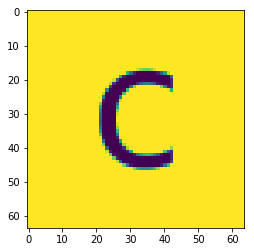

In [9]:
plt.imshow(C[0].view(-1,64).cpu().numpy())

In [4]:
import numpy as np
import pylab as pl
import ot


In [6]:
E[1].shape

torch.Size([4096, 2])

In [23]:
E1 = E[0].view(-1,64).cpu().numpy()
B1 = B[0].view(-1,64).cpu().numpy()
C1 = C[0].view(-1,64).cpu().numpy()
D1 = D[0].view(-1,64).cpu().numpy()

In [24]:
IMAGES = [E1, B1, C1, D1]

In [25]:
IMAGES = np.array(IMAGES)

In [26]:
nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))


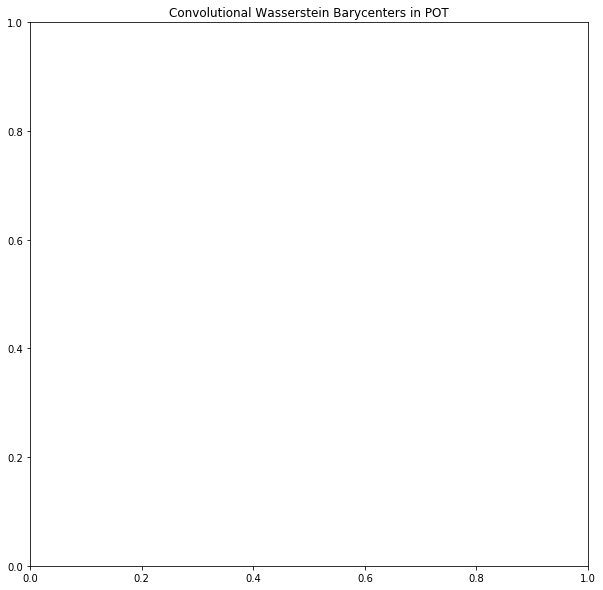

In [27]:
pl.figure(figsize=(10, 10))
pl.title('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 0.004

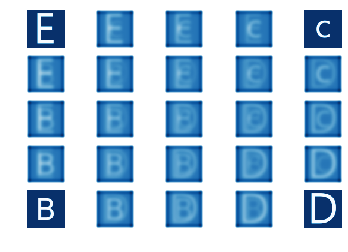

In [30]:
for i in range(nb_images):
    for j in range(nb_images):
        pl.subplot(nb_images, nb_images, i * nb_images + j + 1)
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            pl.imshow(E1, cmap=cm)
            pl.axis('off')
        elif i == 0 and j == (nb_images - 1):
            pl.imshow(C1, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == 0:
            pl.imshow(B1, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            pl.imshow(D1, cmap=cm)
            pl.axis('off')
        else:
            # call to barycenter computation
            pl.imshow(ot.bregman.convolutional_barycenter2d(IMAGES, reg, weights), cmap=cm)
            pl.axis('off')
pl.show()

In [32]:
IMAGES.shape

(4, 64, 64)